In [2]:
import pandas as pd 

df = pd.DataFrame.from_csv('tagged.csv')

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,state,id,link,county,newspaper,date,content,notice_id,category,POS,pos_dist
0,1,1,1,Mississippi,626/2272017_23983816,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"notice of auction\r\non friday, march 17, 2017...",23983816.0,['Auctions'],"[('notice', 'NN'), ('of', 'IN'), ('auction', '...","Counter({'CD': 13, 'NN': 12, 'IN': 5, 'JJ': 3,..."
1,9,9,9,Mississippi,626/2272017_23983815,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"public notice\r\non october 28, 2015, the pa s...",23983815.0,['License Suspension'],"[('public', 'JJ'), ('notice', 'NN'), ('on', 'I...","Counter({'NN': 15, 'IN': 6, 'DT': 6, 'JJ': 5, ..."
2,16,16,16,Wyoming,3493/3302017_24045793,http://www.publicnoticeads.com/WY/search/view....,Fremont,Riverton Ranger,2017/02/24,click to view pdf.\r\n\r\nrepayment contract f...,24045793.0,[],"[('click', 'NN'), ('to', 'TO'), ('view', 'VB')...","Counter({'NN': 53, 'IN': 26, 'CD': 20, 'DT': 1..."
3,17,17,17,Mississippi,626/2272017_23983812,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,notice of medical practice closure:\r\neffecti...,23983812.0,[],"[('notice', 'NN'), ('of', 'IN'), ('medical', '...","Counter({'NN': 27, 'JJ': 23, 'IN': 18, 'CD': 1..."
4,19,19,19,Arkansas,3147/2272017_23983801,http://www.publicnoticeads.com/AR/search/view....,Sebastian,Times Record (Fort Smith),2017/02/24,fort smith port authority is requesting sealed...,23983801.0,[],"[('fort', 'NN'), ('smith', 'NN'), ('port', 'NN...","Counter({'NN': 13, 'IN': 7, 'CD': 6, 'NNS': 4,..."


In [29]:
import nltk
from nltk.tag.stanford import StanfordNERTagger
import os
java_path = "C:\\Program Files\\Java\\jdk-10.0.2\\bin\\java.exe"
os.environ['JAVAHOME'] = java_path

sentence = u"Twenty miles east of Reno, Nev., las vegas " \
    "where packs of wild mustangs roam free through " \
    "the parched landscape, Tesla Gigafactory 1 " \
    "sprawls near Interstate 80."

#sentence = "public notice bill no. 3124 ordinance no. 3390 zca-06-660020-a13 the falls at lake las vegas parcel 6a an ordinance of the city council of the city of henderson, nevada, amending ordinance no. 2870, the zoning map, to reclassify certain real property within the city limits of the city, described as a portion of section 27, township 21 south, range 63 east, m.d.b. & m., clark county, nevada, located northwest of via vin santo and lake las vegas parkway, in the lake las vegas planning area, from ps-mp (public/semipublic) to rs-8-mp (low-density residential) on 0.4 acre and from rs-8-mp (low-density residential) to ps-mp (public/semipublic) on 0.4 acre, all with master plan overlay, to make minor adjustments to the boundaries. the above bill no. 3124 and foregoing ordinance was first proposed and read by title to the city council of the city of henderson, nevada, on february 07, 2017, which was a regular meeting of the council and referred to the following committee: 'committee of the whole' for recommendation. public notice is hereby given that the typewritten copies of the above mentioned ordinance are available for inspection by all interested parties at the office of the city clerk, 240 water street, henderson, nevada, and that said ordinance no. 3390 was proposed for adoption by councilmember schroder on february 21, 2017; and adopted by the following roll call vote: voting aye: mayor andy hafen councilmembers, dan h. stewart, debra march, john f. marz, and gerri schroder voting nay: none abstaining: none absent: none sabrina mercadante, mmc, city clerk pub: february 24, 2017 lv review-journal"

jar = '.\\stanford-ner-2018-02-27\\stanford-ner.jar'
model = '.\\stanford-ner-2018-02-27\\classifiers\\english.all.3class.distsim.crf.ser.gz'

# Prepare NER tagger with english model
ner_tagger = StanfordNERTagger(model, jar, encoding='utf8')

# Tokenize: Split sentence into words
words = nltk.word_tokenize(sentence)

# Run NER tagger on words
print(ner_tagger.tag(words))

[('Twenty', 'O'), ('miles', 'O'), ('east', 'O'), ('of', 'O'), ('Reno', 'LOCATION'), (',', 'O'), ('Nev.', 'LOCATION'), (',', 'O'), ('las', 'O'), ('vegas', 'O'), ('where', 'O'), ('packs', 'O'), ('of', 'O'), ('wild', 'O'), ('mustangs', 'O'), ('roam', 'O'), ('free', 'O'), ('through', 'O'), ('the', 'O'), ('parched', 'O'), ('landscape', 'O'), (',', 'O'), ('Tesla', 'ORGANIZATION'), ('Gigafactory', 'ORGANIZATION'), ('1', 'O'), ('sprawls', 'O'), ('near', 'O'), ('Interstate', 'LOCATION'), ('80', 'LOCATION'), ('.', 'O')]


In [12]:
data = df.content.head(50).tolist()

In [35]:
for i,d in enumerate(data):
    doc = nlp(d)
    print([(X.text, X.label_) for X in doc.ents])

[('friday', 'DATE'), ('march 17, 2017', 'DATE'), ('9am', 'TIME'), ('1984', 'DATE'), ('88', 'CARDINAL'), ('\r\n', 'MONEY'), ('24', 'CARDINAL'), ('3066', 'DATE'), ('43', 'DATE'), ('39466', 'DATE'), ('2/24/17', 'CARDINAL'), ('3/03/17', 'CARDINAL'), ('3/10/17', 'CARDINAL')]
[('october 28, 2015', 'DATE'), ('500', 'MONEY'), ('february 24, 2017', 'DATE')]
[('\r\n\r\n', 'DATE'), ('november 2', 'DATE'), ('\r\n1978', 'DATE'), ('95-578', 'CARDINAL'), ('92', 'CARDINAL'), ('2471', 'DATE'), ('43', 'CARDINAL'), ('506', 'CARDINAL'), ('15 percent', 'PERCENT'), ('60 days', 'DATE'), ('first', 'ORDINAL'), ('307', 'CARDINAL'), ('261', 'CARDINAL'), ('bemerrill@usbr.gov', 'GPE'), ('1630', 'DATE'), ('82644', 'CARDINAL'), ('february 16, 17,', 'DATE'), ('19, 23', 'DATE'), ('24', 'DATE'), ('26', 'DATE')]
[('february 28, 2017', 'DATE'), ('\r\n', 'GPE'), ('1702', 'DATE'), ('11', 'CARDINAL'), ('849', 'CARDINAL'), ('90', 'CARDINAL'), ('the last year', 'DATE'), ('february 20', 'DATE'), ('985-951-7148', 'CARDINAL'), (

[('\r\nminutes', 'TIME'), ('february 2, 2017', 'DATE'), ('7:00 p.m.', 'TIME'), ('councilmemberï¿½s', 'ORG'), ('first', 'ORDINAL'), ('jack', 'PERSON'), ('march 18th', 'DATE'), ('hourly', 'TIME'), ('hourly', 'TIME'), ('1', 'CARDINAL'), ('1', 'CARDINAL'), ('second', 'ORDINAL'), ('the january 19, 2017 council', 'DATE'), ('second', 'ORDINAL'), ('2017-01', 'DATE'), ('2017-01', 'DATE'), ('third', 'ORDINAL'), ('second', 'ORDINAL'), ('2017-02', 'DATE'), ('2017-02', 'DATE'), ('third', 'ORDINAL'), ('second', 'ORDINAL'), ('2017-03', 'DATE'), ('2017-03', 'DATE'), ('third', 'ORDINAL'), ('second', 'ORDINAL'), ('2017-04', 'DATE'), ('2017-04', 'DATE'), ('second', 'ORDINAL'), ('second', 'ORDINAL'), ('2017-05', 'DATE'), ('2017-05', 'DATE'), ('third', 'ORDINAL'), ('second', 'ORDINAL'), ('2017-06', 'CARDINAL'), ('second', 'ORDINAL'), ('second', 'ORDINAL'), ('2017', 'MONEY'), ('2017', 'MONEY'), ('second', 'ORDINAL'), ('194.90', 'MONEY'), ('500.00', 'MONEY'), ('12,766.92', 'MONEY'), ('1,814.32', 'CARDINAL'),

[('7', 'CARDINAL'), ('7', 'CARDINAL'), ('february 7, 2017', 'DATE'), ('april 29, 2017', 'DATE'), ('7', 'CARDINAL'), ('five', 'CARDINAL'), ('5', 'CARDINAL'), ('one', 'CARDINAL'), ('\r\n', 'GPE'), ('340,400', 'MONEY'), ('ten', 'CARDINAL'), ('the year 2018', 'DATE'), ('year 2027', 'DATE'), ('\r\nseven o?clock (', 'FAC'), ('\r\na.m.', 'TIME'), ('\r\neight o?clock (8:00)\r\np.m.', 'TIME'), ('18:541', 'PERSON'), ('\r\n', 'GPE'), ('\r\n', 'GPE'), ('1155', 'DATE'), ('\r\ncity', 'GPE'), ('\r\n30', 'DATE'), ('1333', 'DATE'), ('\r\n31', 'DATE'), ('1325', 'DATE'), ('32', 'CARDINAL'), ('700', 'CARDINAL'), ('\r\n33', 'DATE'), ('3955', 'DATE'), ('the monies\r\n', 'DATE'), ('\r\n', 'GPE'), ('5', 'CARDINAL'), ('\r\n', 'GPE'), ('18', 'CARDINAL'), ('\r\n', 'GPE'), ('\r\n', 'GPE'), ('1950', 'DATE'), ('\r\n', 'ORDINAL'), ('\r\n', 'GPE'), ('\r\n1701', 'ORG'), ('tuesday', 'DATE'), ('\r\n', 'GPE'), ('june 6', 'DATE'), ('\r\n2017', 'DATE'), ('6:30', 'TIME'), ('\r\np.m.', 'TIME'), ('the 7th day', 'DATE'), ('\r\

In [20]:
person = {}
organization = {}

for i,d in enumerate(data):
    #if i%10000:
    #    print(i)
    #print(d)
    # Tokenize: Split sentence into words
    d = str(d)
    words = nltk.word_tokenize(d)
    # Run NER tagger on words
    tags = ner_tagger.tag(words)
    print(tags)
    for tag in tags:
        key = tag[0]
        if tag[1]=='PERSON':
            person[key] = person.get(key, 0) + 1
        if tag[1]=='ORGANIZATION':
            organization[key] = organization.get(key, 0) + 1

[('notice', 'O'), ('of', 'O'), ('auction', 'O'), ('on', 'O'), ('friday', 'O'), (',', 'O'), ('march', 'O'), ('17', 'O'), (',', 'O'), ('2017', 'O'), ('at', 'O'), ('9am', 'O'), (',', 'O'), ('we', 'O'), ('will', 'O'), ('be', 'O'), ('holding', 'O'), ('an', 'O'), ('auction', 'O'), ('on', 'O'), ('the', 'O'), ('following', 'O'), ('abandonedwrecked', 'O'), ('vehicle', 'O'), (':', 'O'), ('1984', 'O'), ('oldsmobile', 'O'), ('88', 'O'), ('vin', 'O'), ('#', 'O'), ('1g3bn69y3fy328464', 'O'), ('road', 'O'), ('assist', 'O'), ('24', 'O'), (',', 'O'), ('3066', 'O'), ('hwy', 'O'), ('43', 'O'), ('s.', 'O'), (',', 'O'), ('picayune', 'O'), (',', 'O'), ('ms', 'O'), ('39466', 'O'), ('publish', 'O'), (':', 'O'), ('22417', 'O'), (',', 'O'), ('30317', 'O'), ('and', 'O'), ('31017', 'O')]
[('public', 'O'), ('notice', 'O'), ('on', 'O'), ('october', 'O'), ('28', 'O'), (',', 'O'), ('2015', 'O'), (',', 'O'), ('the', 'O'), ('pa', 'O'), ('state', 'O'), ('board', 'O'), ('of', 'O'), ('nursing', 'O'), ('assessed', 'O'), ('

[('february', 'O'), ('24', 'O'), ('legals', 'O'), ('notice', 'O'), ('of', 'O'), ('special', 'O'), ('election', 'O'), ('pursuant', 'O'), ('to', 'O'), ('the', 'O'), ('provisions', 'O'), ('of', 'O'), ('a', 'O'), ('resolution', 'O'), ('adopted', 'O'), ('by', 'O'), ('the', 'O'), ('parish', 'O'), ('school', 'O'), ('board', 'O'), ('of', 'O'), ('the', 'O'), ('parish', 'O'), ('of', 'O'), ('lincoln', 'O'), (',', 'O'), ('state', 'O'), ('of', 'O'), ('louisiana', 'O'), ('(', 'O'), ('the', 'O'), ('``', 'O'), ('governing', 'O'), ('authority', 'O'), ("''", 'O'), (')', 'O'), (',', 'O'), ('acting', 'O'), ('as', 'O'), ('the', 'O'), ('governing', 'O'), ('authority', 'O'), ('of', 'O'), ('consolidated', 'O'), ('school', 'O'), ('district', 'O'), ('no', 'O'), ('.', 'O'), ('1', 'O'), ('of', 'O'), ('the', 'O'), ('parish', 'O'), ('of', 'O'), ('lincoln', 'O'), (',', 'O'), ('state', 'O'), ('of', 'O'), ('louisiana', 'O'), ('(', 'O'), ('the', 'O'), ('``', 'O'), ('district', 'O'), ("''", 'O'), (')', 'O'), (',', 'O'),

[('fort', 'O'), ('smith', 'O'), ('port', 'O'), ('authority', 'O'), ('is', 'O'), ('requesting', 'O'), ('sealed', 'O'), ('bid', 'O'), ('to', 'O'), ('200', 'O'), ('navy', 'O'), ('road', 'O'), ('by', 'O'), ('march', 'O'), ('10', 'O'), (',', 'O'), ('2017', 'O'), ('for', 'O'), ('7,778', 'O'), ('cubic', 'O'), ('yards', 'O'), ('of', 'O'), ('compacted', 'O'), ('field', 'O'), ('.', 'O'), ('if', 'O'), ('100', 'O'), ('%', 'O'), ('standard', 'O'), ('compaction', 'O'), ('at', 'O'), ('8', 'O'), ('inch', 'O'), ('lifts', 'O'), ('.', 'O'), ('contact', 'O'), ('marty', 'O'), ('shell', 'O'), ('at', 'O'), ('785-2837', 'O'), ('for', 'O'), ('any', 'O'), ('questions', 'O'), ('.', 'O')]
[('fort', 'O'), ('smith', 'O'), ('port', 'O'), ('authority', 'O'), ('is', 'O'), ('requesting', 'O'), ('sealed', 'O'), ('bid', 'O'), ('to', 'O'), ('200', 'O'), ('navy', 'O'), ('road', 'O'), ('by', 'O'), ('march', 'O'), ('10', 'O'), (',', 'O'), ('2017', 'O'), ('for', 'O'), ('7,778', 'O'), ('cubic', 'O'), ('yards', 'O'), ('of', 'O'

[('public', 'O'), ('notice', 'O'), ('bill', 'O'), ('no', 'O'), ('.', 'O'), ('3120', 'O'), ('ordinance', 'O'), ('no', 'O'), ('.', 'O'), ('3387', 'O'), ('zoa-16-500597-development', 'O'), ('code', 'O'), ('update', 'O'), ('2017', 'O'), ('an', 'O'), ('ordinance', 'O'), ('of', 'O'), ('the', 'O'), ('city', 'O'), ('council', 'O'), ('of', 'O'), ('the', 'O'), ('city', 'O'), ('of', 'O'), ('henderson', 'O'), (',', 'O'), ('nevada', 'O'), (',', 'O'), ('to', 'O'), ('amend', 'O'), ('title', 'O'), ('19', 'O'), ('henderson', 'O'), ('development', 'O'), ('code', 'O'), ('-', 'O'), ('by', 'O'), ('amending', 'O'), ('portions', 'O'), ('of', 'O'), ('sections', 'O'), ('19.6.10', 'O'), (',', 'O'), ('19.7.10', 'O'), (',', 'O'), ('and', 'O'), ('19.12.4', 'O'), (',', 'O'), ('of', 'O'), ('the', 'O'), ('henderson', 'O'), ('municipal', 'O'), ('code', 'O'), (';', 'O'), ('to', 'O'), ('make', 'O'), ('various', 'O'), ('revisions', 'O'), ('and', 'O'), ('clarifications', 'O'), ('relating', 'O'), ('to', 'O'), ('development

[('annual', 'O'), ('statement', 'O'), ('of', 'O'), ('shelter', 'O'), ('mutual', 'O'), ('insurance', 'O'), ('company', 'O'), ('for', 'O'), ('the', 'O'), ('year', 'O'), ('ending', 'O'), ('december', 'O'), ('31', 'O'), (',', 'O'), ('2016', 'O'), ('location', 'O'), ('of', 'O'), ('principal', 'O'), ('office', 'O'), (':', 'O'), ('1817', 'O'), ('w.', 'O'), ('broadway', 'O'), (',', 'O'), ('columbia', 'O'), (',', 'O'), ('mo', 'O'), ('65218', 'O'), ('location', 'O'), ('(', 'O'), ('s', 'O'), (')', 'O'), ('of', 'O'), ('business', 'O'), ('in', 'O'), ('nevada', 'O'), (':', 'O'), ('2759', 'O'), ('sunridge', 'O'), ('heights', 'O'), ('parkway', 'O'), ('henderson', 'O'), (',', 'O'), ('nv', 'O'), ('i', 'O'), (',', 'O'), ('christina', 'PERSON'), ('m.', 'PERSON'), ('workman', 'PERSON'), (',', 'O'), ('vice', 'O'), ('president', 'O'), (',', 'O'), ('submit', 'O'), ('the', 'O'), ('above', 'O'), ('statement', 'O'), ('pursuant', 'O'), ('to', 'O'), ('nrs', 'O'), ('80.190.', 'O'), ('pub', 'O'), (':', 'O'), ('febru

[('sheriff', 'O'), ("'s", 'O'), ('sales', 'O'), ('gulf', 'O'), ('coast', 'O'), ('bank', 'O'), ('and', 'O'), ('trust', 'O'), ('co', 'O'), ('vs.', 'O'), ('rodney', 'O'), ('j.', 'O'), ('neumeyer', 'O'), (',', 'O'), ('sr.', 'O'), ('and', 'O'), ('shawn', 'O'), ('c.', 'O'), ('neumeyer', 'O'), (',', 'O'), ('#', 'O'), ('16-1590', 'O'), ('chase', 'O'), ('bank', 'O'), ('na', 'O'), ('vs.', 'O'), ('rene', 'O'), ('a.', 'O'), ('hauck', 'O'), (',', 'O'), ('iii', 'O'), (',', 'O'), ('#', 'O'), ('16-0066', 'O'), ('chase', 'O'), ('bank', 'O'), ('na', 'O'), ('vs.', 'O'), ('albert', 'O'), ('r.', 'O'), ('bianchini', 'O'), (',', 'O'), ('#', 'O'), ('17-0041', 'O'), ('gmfs', 'O'), ('llc', 'O'), ('vs.', 'O'), ('annette', 'O'), ('b.', 'O'), ('gallardo', 'O'), (',', 'O'), ('#', 'O'), ('17-0152', 'O'), ('rendered', 'O'), ('from', 'O'), ('image', 'O'), ('file', 'O'), ('.', 'O'), ('rendered', 'O'), ('from', 'O'), ('image', 'O'), ('file', 'O'), ('.', 'O'), ('rendered', 'O'), ('from', 'O'), ('image', 'O'), ('file', 'O

[('public', 'O'), ('notice', 'O'), ('anyone', 'O'), ('knowing', 'O'), ('the', 'O'), ('whereabouts', 'O'), ('of', 'O'), ('rene', 'O'), ('a.', 'O'), ('hauck', 'O'), (',', 'O'), ('iii', 'O'), ('aka', 'O'), ('rene', 'O'), ('authur', 'O'), ('hauck', 'O'), (',', 'O'), ('iii', 'O'), (',', 'O'), ('please', 'O'), ('contact', 'O'), ('samuel', 'O'), ('l.', 'O'), ('fuller', 'O'), (',', 'O'), ('attorney', 'O'), ('at', 'O'), ('law', 'O'), ('-', 'O'), ('2203', 'O'), ('pakenham', 'O'), ('drive', 'O'), (',', 'O'), ('chalmette', 'O'), (',', 'O'), ('la', 'O'), ('70043', 'O'), (';', 'O'), ('(', 'O'), ('504', 'O'), (')', 'O'), ('279-5177.', 'O'), ('february', 'O'), ('24', 'O'), (',', 'O'), ('2017', 'O')]
[('notice', 'O'), ('of', 'O'), ('abandoned', 'O'), ('vehicle', 'O'), ('harrison', 'O'), ('towing', 'O'), ('&', 'O'), ('recovery', 'O'), ('5613', 'O'), ('maxie', 'O'), ('camp', 'O'), ('rd', 'O'), ('harrison', 'O'), (',', 'O'), ('ar', 'O'), (',', 'O'), ('72601', 'O'), ('ph', 'O'), (':', 'O'), ('870-365-6198'

[('resolution', 'O'), ('#', 'O'), ('02-06-2017-1', 'O'), ('a', 'O'), ('resolution', 'O'), ('concerning', 'O'), ('police', 'O'), ('jurisdiction', 'O'), ('whereas', 'O'), (',', 'O'), ('the', 'O'), ('citytown', 'O'), ('council', 'O'), ('of', 'O'), ('parkin', 'O'), (',', 'O'), ('arkansas', 'O'), ('deems', 'O'), ('it', 'O'), ('necessary', 'O'), ('and', 'O'), ('in', 'O'), ('the', 'O'), ('best', 'O'), ('interest', 'O'), ('of', 'O'), ('the', 'O'), ('citytown', 'O'), ('to', 'O'), ('reaffirm', 'O'), ('state', 'O'), ('law', 'O'), ('on', 'O'), ('its', 'O'), ('police', 'O'), ('departments', 'O'), ('jurisdiction', 'O'), (';', 'O'), ('now', 'O'), (',', 'O'), ('therefore', 'O'), (',', 'O'), ('be', 'O'), ('it', 'O'), ('resolved', 'O'), ('by', 'O'), ('the', 'O'), ('citytown', 'O'), ('council', 'O'), ('of', 'O'), ('the', 'O'), ('citytown', 'O'), ('of', 'O'), ('parkin', 'O'), (',', 'O'), ('arkansas', 'O'), (':', 'O'), ('section', 'O'), ('1.', 'O'), ('the', 'O'), ('citytown', 'O'), ('of', 'O'), ('parkin', 

[('athens', 'O'), ('city', 'O'), ('school', 'O'), ('board', 'O'), ('member', 'O'), ('vacancy', 'O'), ('vacancy', 'O'), ('is', 'O'), ('for', 'O'), ('1', 'O'), ('school', 'O'), ('board', 'O'), ('member', 'O'), ('seat', 'O'), ('which', 'O'), ('is', 'O'), ('vacant', 'O'), ('until', 'O'), ('the', 'O'), ('next', 'O'), ('city', 'O'), ('election', 'O'), ('scheduled', 'O'), ('for', 'O'), ('november', 'O'), ('2018.', 'O'), ('apply', 'O'), ('on-line', 'O'), ('a', 'O'), ('www.athenscityschools.net', 'O'), ('.', 'O'), ('applications', 'O'), ('and', 'O'), ('written', 'O'), ('responses', 'O'), ('will', 'O'), ('be', 'O'), ('received', 'O'), ('until', 'O'), ('friday', 'O'), (',', 'O'), ('march', 'O'), ('3', 'O'), (',', 'O'), ('2017', 'O'), ('at', 'O'), ('noon', 'O'), ('.', 'O'), ('for', 'O'), ('questions', 'O'), (',', 'O'), ('please', 'O'), ('contact', 'O'), (':', 'O'), ('mike', 'O'), ('bevins', 'O'), ('board', 'O'), ('chairman', 'O'), ('at', 'O'), ('423-507-5401', 'O'), ('.', 'O')]
[('one', 'O'), ('('

[('athens', 'O'), ('recycling', 'O'), ('center', 'O'), ('rocky', 'O'), ('mount', 'O'), ('road', 'O'), ('423-744-2748.', 'O'), ('accepting', 'O'), ('cardboard', 'O'), (',', 'O'), ('paper', 'O'), (',', 'O'), ('plastics', 'O'), ('1', 'O'), ('&', 'O'), ('2', 'O'), ('only', 'O'), (',', 'O'), ('aluminum', 'O'), ('cans', 'O'), (',', 'O'), ('tin', 'O'), ('cans', 'O'), (',', 'O'), ('glass', 'O'), (',', 'O'), ('cooking', 'O'), ('oil', 'O'), (',', 'O'), ('motor', 'O'), ('oil', 'O'), (',', 'O'), ('oil', 'O'), ('filters', 'O'), (',', 'O'), ('electronics', 'O'), (',', 'O'), ('rechargeable', 'O'), ('batteries', 'O'), (',', 'O'), ('car', 'O'), ('batteries', 'O'), ('and', 'O'), ('antifreeze', 'O'), ('.', 'O'), ('hours', 'O'), (':', 'O'), ('monday', 'O'), ('&', 'O'), ('friday', 'O'), (',', 'O'), ('7am-3pm', 'O'), (',', 'O'), ('tuesday', 'O'), ('-', 'O'), ('thursday', 'O'), (',', 'O'), ('11am-6pm', 'O'), (',', 'O'), ('saturday', 'O'), (',', 'O'), ('8am-noon', 'O'), ('.', 'O'), ('closed', 'O'), ('sunday',

[('annual', 'O'), ('statement', 'O'), ('of', 'O'), ('the', 'O'), ('american', 'O'), ('franchise', 'O'), ('specialist', 'O'), ('agency', 'O'), (',', 'O'), ('inc.', 'O'), ('2016', 'O'), ('location', 'O'), ('of', 'O'), ('principal', 'O'), ('office', 'O'), (':', 'O'), ('326', 'O'), ('walt', 'O'), ('whitman', 'O'), ('rd', 'O'), (',', 'O'), ('huntington', 'O'), ('station', 'O'), (',', 'O'), ('ny', 'O'), ('11746', 'O'), ('location', 'O'), ('or', 'O'), ('locations', 'O'), ('of', 'O'), ('business', 'O'), ('in', 'O'), ('nevada', 'O'), (':', 'O'), ('318', 'O'), ('n.', 'O'), ('carson', 'O'), ('st', 'O'), ('#', 'O'), ('208', 'O'), (',', 'O'), ('carson', 'O'), ('city', 'O'), (',', 'O'), ('nv', 'O'), ('89701', 'O'), ('american', 'O'), ('franchise', 'O'), ('specialist', 'O'), ('agency', 'O'), ('inc.', 'O'), ('did', 'O'), ('not', 'O'), ('conduct', 'O'), ('business', 'O'), ('in', 'O'), ('the', 'O'), ('state', 'O'), ('of', 'O'), ('nevada', 'O'), ('during', 'O'), ('the', 'O'), ('calendar', 'O'), ('year', 

[('notice', 'O'), ('of', 'O'), ('acceptance', 'O'), ('and', 'O'), ('final', 'O'), ('settlement', 'O'), ('marbleton', 'O'), ('landfill', 'O'), ('#', 'O'), ('2', 'O'), ('nw', 'O'), ('lysimeter', 'O'), ('sublette', 'O'), ('county', 'O'), (',', 'O'), ('wyoming', 'O'), ('notice', 'O'), ('is', 'O'), ('hereby', 'O'), ('published', 'O'), ('that', 'O'), ('sublette', 'O'), ('county', 'O'), ('has', 'O'), ('accepted', 'O'), ('as', 'O'), ('completed', 'O'), ('all', 'O'), ('work', 'O'), ('on', 'O'), ('the', 'O'), ('marbleton', 'O'), ('landfill', 'O'), ('#', 'O'), ('2', 'O'), ('nw', 'O'), ('lysimeter', 'O'), ('according', 'O'), ('to', 'O'), ('the', 'O'), ('plans', 'O'), (',', 'O'), ('specifications', 'O'), ('and', 'O'), ('rules', 'O'), ('set', 'O'), ('forth', 'O'), ('between', 'O'), ('sublette', 'O'), ('county', 'O'), ('and', 'O'), ('r.', 'O'), ('s.', 'O'), ('bennett', 'O'), ('construction', 'O'), ('company', 'O'), (',', 'O'), ('inc.', 'O'), ('of', 'O'), ('big', 'O'), ('piney', 'O'), (',', 'O'), ('wy

[('one', 'O'), ('(', 'O'), ('1', 'O'), (')', 'O'), ('2006', 'O'), ('chevy', 'O'), ('bls', 'O'), ('vin', 'O'), ('#', 'O'), ('1g1ak55f967814486', 'O'), ('.', 'O'), ('this', 'O'), ('vehicle', 'O'), ('was', 'O'), ('abandoned', 'O'), ('at', 'O'), ('hankins', 'O'), ('wrecker', 'O'), ('service', 'O'), ('.', 'O'), ('the', 'O'), ('above', 'O'), ('vehicle', 'O'), ('will', 'O'), ('sell', 'O'), ('to', 'O'), ('the', 'O'), ('highest', 'O'), ('bidder', 'O'), ('on', 'O'), ('march', 'O'), ('10', 'O'), (',', 'O'), ('2017', 'O'), ('at', 'O'), ('10:00', 'O'), ('am', 'O'), ('at', 'O'), ('hankins', 'O'), ('wrecker', 'O'), ('service', 'O'), ('&', 'O'), ('auto', 'O'), ('repair', 'O'), (',', 'O'), ('16380', 'O'), ('hwy', 'O'), ('8', 'O'), ('west', 'O'), ('grenada', 'O'), (',', 'O'), ('ms', 'O'), ('38901.', 'O'), ('for', 'O'), ('storage', 'O'), ('&', 'O'), ('wrecker', 'O'), ('service', 'O'), ('and', 'O'), ('repairs', 'O'), ('in', 'O'), ('accordance', 'O'), ('with', 'O'), ('section', 'O'), ('63-23-1', 'O'), ('th

[('annual', 'O'), ('statement', 'O'), ('of', 'O'), ('the', 'O'), ('syscon', 'O'), ('justice', 'O'), ('systems', 'O'), ('canada', 'O'), ('ltd.', 'O'), ('12312016', 'O'), ('location', 'O'), ('of', 'O'), ('principal', 'O'), ('office', 'O'), (':', 'O'), ('300-3600', 'O'), ('lysander', 'O'), ('ln', 'O'), (',', 'O'), ('richmond', 'O'), (',', 'O'), ('b.c', 'O'), ('.', 'O'), ('v7b', 'O'), ('1c3', 'O'), (',', 'O'), ('canada', 'O'), ('location', 'O'), ('or', 'O'), ('locations', 'O'), ('of', 'O'), ('business', 'O'), ('in', 'O'), ('nevada', 'O'), (':', 'O'), ('na', 'O'), ('syscon', 'O'), ('justice', 'O'), ('systems', 'O'), ('canada', 'O'), ('ltd.', 'O'), ('did', 'O'), ('conduct', 'O'), ('business', 'O'), ('in', 'O'), ('the', 'O'), ('state', 'O'), ('of', 'O'), ('nevada', 'O'), ('during', 'O'), ('the', 'O'), ('calendar', 'O'), ('year', 'O'), ('2016.', 'O'), ('a', 'O'), ('financial', 'O'), ('statement', 'O'), ('of', 'O'), ('the', 'O'), ('above', 'O'), ('mentioned', 'O'), ('calendar', 'O'), ('year', '

In [11]:
print(len(person))
print(len(organization))

0
0


In [17]:
from textblob import TextBlob
nltk.download('brown')

text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

blob = TextBlob(text)
blob.tags           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Prime\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


WordList(['titular threat', 'blob', 'ultimate movie monster', 'amoeba-like mass', 'snide', 'potential consequences', 'grey goo scenario', 'technological theorists fearful', 'artificial intelligence run rampant'])

In [19]:
person = {}
for d in data:
    blob = TextBlob(d)
    print(blob.noun_phrases )

['vin # 1g3bn69y3fy328464 road']
['public notice', 'pa state board', 'civil penalty', 'raynel robin spiers', 'pa license']
['view pdf', 'repayment contract', 'dams modification', 'bull lake dam', 'dams modification', 'bull lake dam', 'reclamation safety', 'public law', 'midvale irrigation district plan', 'proportionate share', 'modification costs', 'total cost', 'project beneficiaries', 'draft contract', 'additional information', 'contact brock merrill', 'bemerrill @ usbr.gov', 'area office', '82644. pub', 'ranger february']
['medical practice closure', 'effective february', 'louisiana heart', 'medical group', 'louisiana heart hospital', 'practice locations', 'bay st. louis', 'new private practice', 'new location', 'medical records', 'medsouth record management', 'lhmg patient', 'medical records', '985-951-7148. publish']
['fort smith port authority', 'navy road', 'cubic yards', 'standard compaction', 'inch lifts', 'contact marty shell']
['annual statement', 'mutual insurance company',

['county clerk proclamation community college district', 'san juan county', 'new mexico whereas', 'county clerk', 'public notice', 'regular community college district election', 'county clerk', 'regular election', 'various precincts', 'san juan county', 'community college district board', '6-year term', 'matthew d tso district', '6-year term', 'john c thompson richard e hoerner', 'san juan college districts', 'convenience centers', 'voter convenience centers', 'phil l thomas', 'arts center u.s. hwy 64/west', 'shiprock high school shiprock', 'pinon hills', 'day adventist church', 'foothills dr. farmington', 'absentee voter precinct office', 'county clerk', 'san juan county san juan county administration building', 'oliver drive', 'election day', 'regular college district election', 'absentee precinct board', 'phil l thomas', 'arts center officials', 'stanford begay judge', 'jacida loley judge', 'sandia k bedah clerk', 'daniela h allen clerk', 'stevenson whitehorse interpreter', 'maetah 

In [9]:
df.content = df.content.str.lower()
df['top_ten'] = df.content.str.split().str[:20]

In [11]:
df = df.dropna()
text = df.top_ten.tolist()
text = [item for sublist in text for item in sublist]
text = ' '.join(text)

In [12]:
from collections import Counter

words = text.split()
word_freq = Counter(words)
print(word_freq.most_common(10))

[('of', 14903), ('the', 11102), ('notice', 7078), ('in', 4926), ('sale', 3216), ('for', 2907), ('to', 2598), ('no.', 2544), ('and', 2300), ('court', 2207)]


(-0.5, 1599.5, 799.5, -0.5)

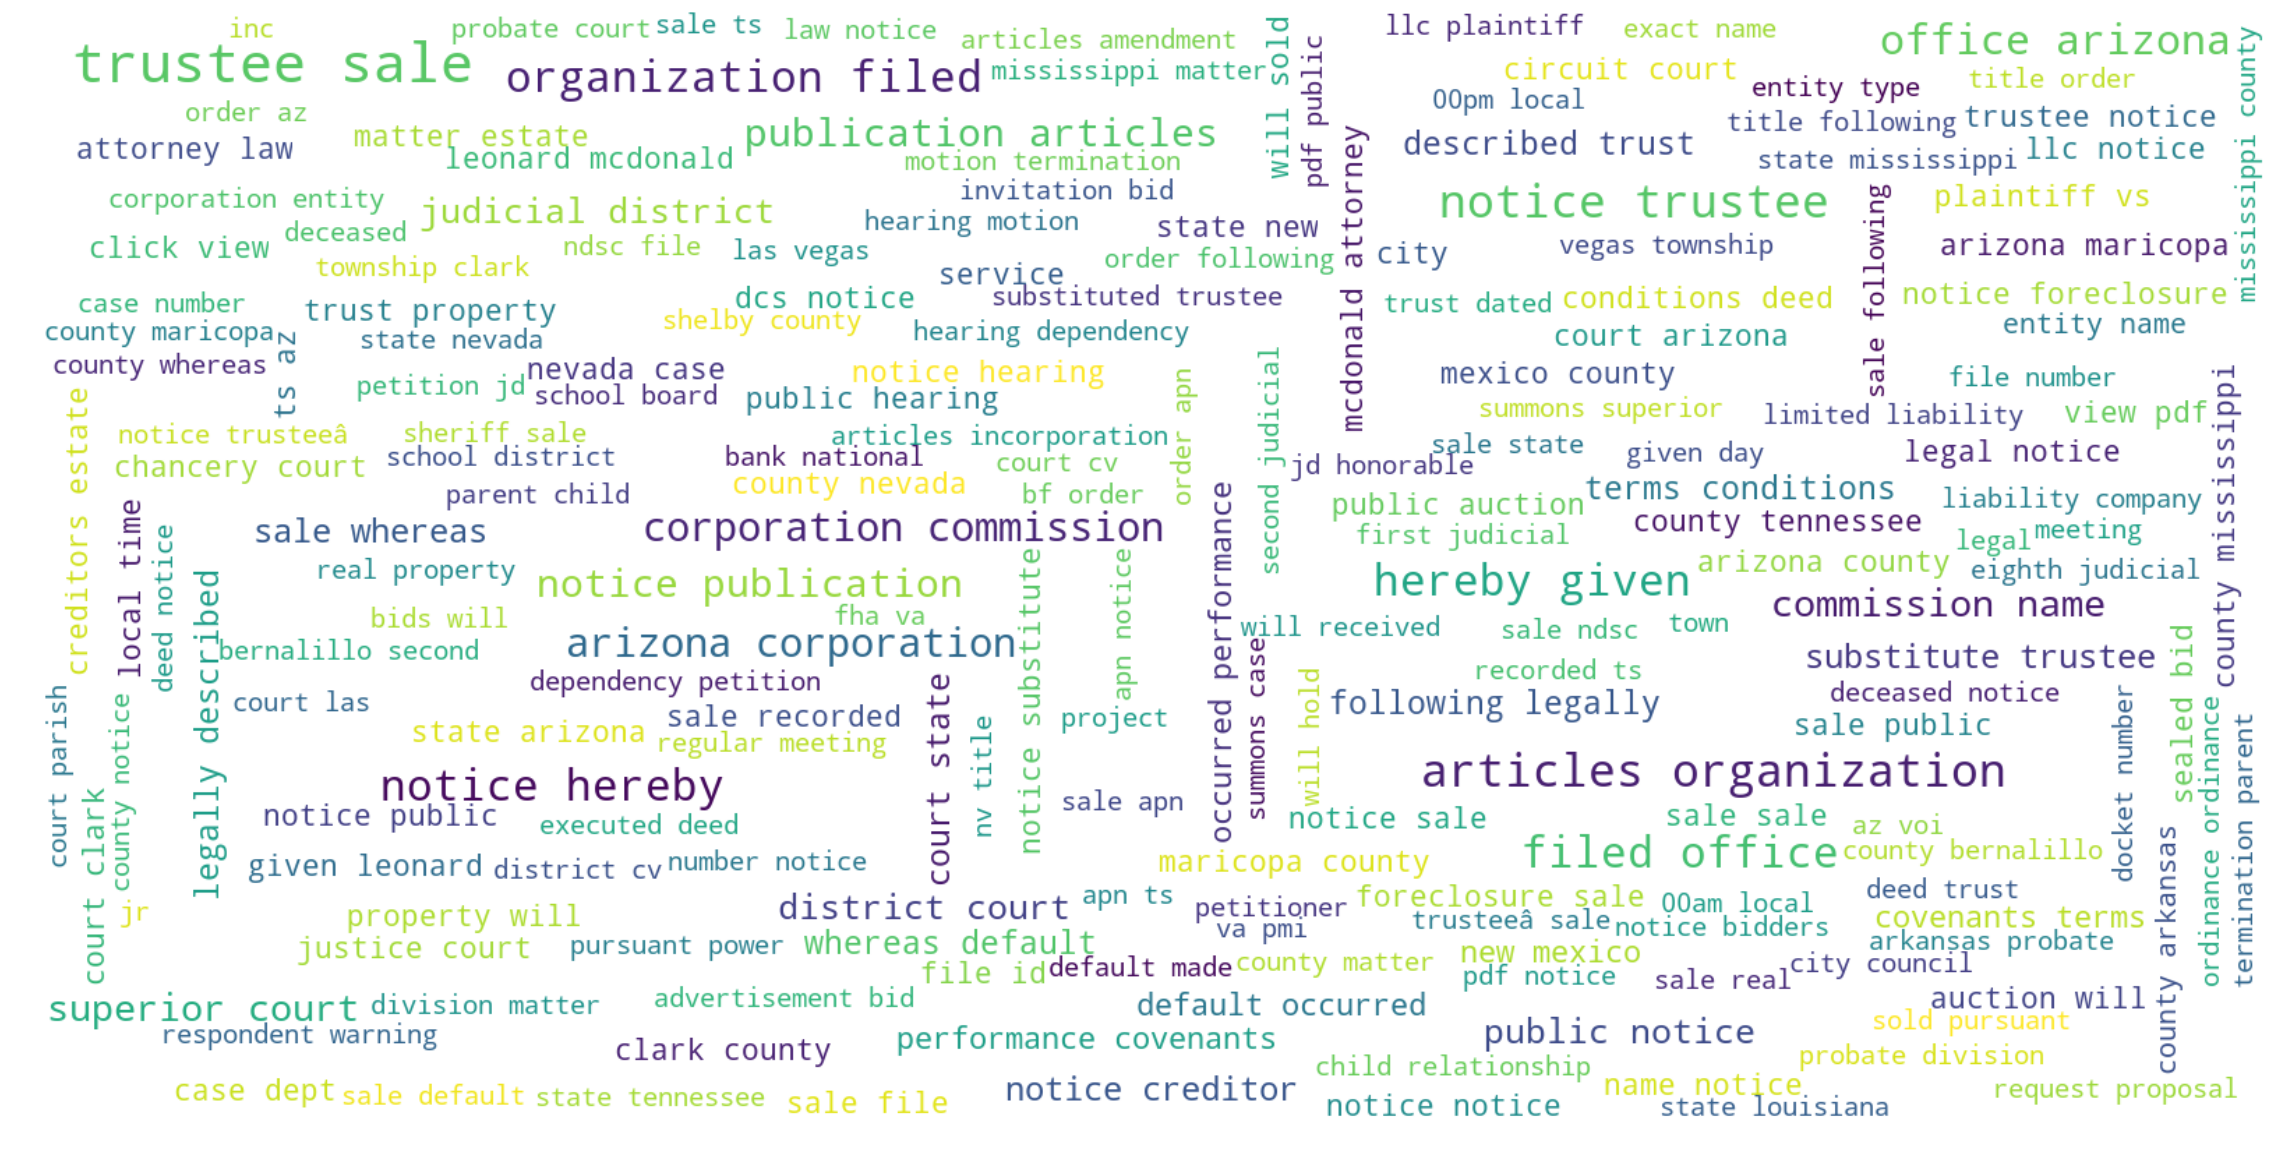

In [13]:
# the matplotlib way:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

#wordcloud = WordCloud(width=1600, height=800, stopwords=stopwords)
#wordcloud.generate_from_frequencies(frequencies=word_freq)

wordcloud = WordCloud(width=1600, 
                      height=800,
                      background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=40, 
                      random_state=42
                      ).generate(str(text))

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [30]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [32]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]
